# End of Distribution imputation
- In this method we replace missing values with far end values or extreme
- Far end value means the values after 3rd stander deviation

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [3]:
data = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### check null values

In [4]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

 - there is 177 null values are present in dataset 

## Perform End of Distribution imputation

![image](https://i.ytimg.com/vi/iiRiOlkLa6A/maxresdefault.jpg)

- first find mean of Age feature 

In [7]:
mean = data['Age'].mean()
mean

29.69911764705882

- now find stander deviation of Age Feature

In [10]:
std = data['Age'].std()
std

14.526497332334044

- Now we have a mean and stander deviation of Age feature now we find the Far end values or extreme value
- where extreme values means the values after 3rd stander deviation 
- so extreme = (Mean of Age Feature + ( 3 * stander deviation of Age Feature))

In [11]:
extreme = (mean + (3*std))
extreme

73.27860964406095

- here we get a extreme value: 73.27860964406095

### let's use some plot for better understanding

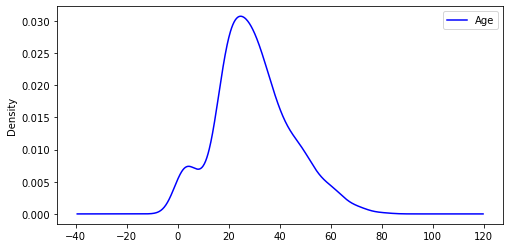

In [41]:
plt.figure(figsize=(8,4))
data.Age.plot(kind='kde',color='b')
plt.legend()

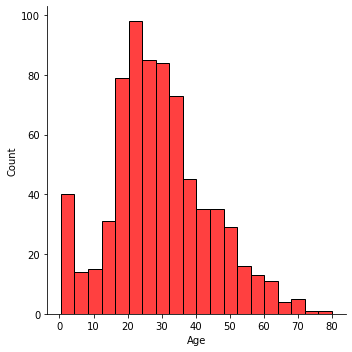

In [17]:
sns.displot(data['Age'],color='r')

D:\DS ENV\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

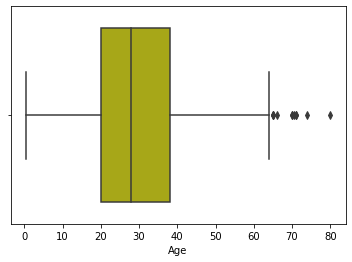

In [27]:
sns.boxplot(data['Age'],color='y')

- from both plots we can see that extrame values are between ~ 70 to 80 in other word it is a outliers

### Create a function to replace misssing in Age with extreme values

In [28]:
def End_distribution(df,variable,extreme):
    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [29]:
End_distribution(data,'Age',extreme)

In [30]:
data.head()

,Survived,Age,Fare,Age_median,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


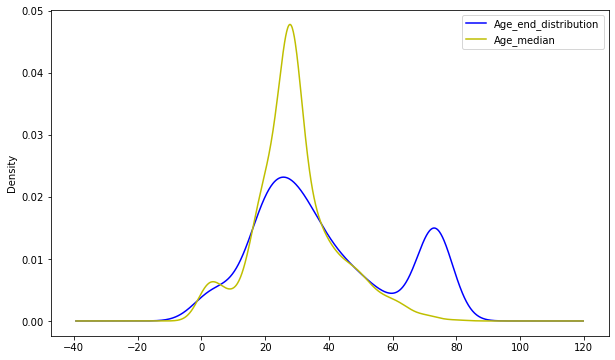

In [43]:
plt.figure(figsize=(10,6))
data.Age_end_distribution.plot(kind='kde',color='b')
data.Age_median.plot(kind='kde',color='y')
plt.legend()

D:\DS ENV\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

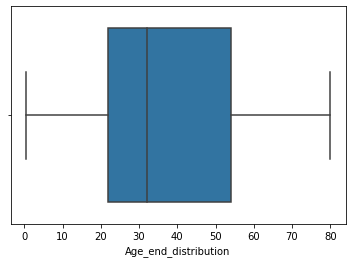

In [45]:
sns.boxplot(data['Age_end_distribution'])

- Now we can see that 
    - when we replace NaN with median then it show distortion
    - but it overcome when we replace NaN with End of Distribution and outlier is also covered.

## I would be glad to hear your feedback on my Notebook!
### Best regards,
#### [Rushi](https://www.kaggle.com/rushikeshlavate)😊😊

### You can also check other techniques of handling Missing values¶
- [Mean/Mode/Median Imputation](https://www.kaggle.com/rushikeshlavate/mean-median-mode-imputation-on-titanic-dataset)
- [Random Sample Imputation](https://www.kaggle.com/rushikeshlavate/random-sample-imputation-on-titanic-dataset)
- [Capturing NaN values with a new feature](https://www.kaggle.com/rushikeshlavate/capturing-nan-values-with-a-new-feature)